In [4]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib
import numpy as np
import xarray as xr
import matplotlib as plt

matplotlib.use("Agg")

%matplotlib inline

import holoviews as hv

hv.notebook_extension("matplotlib")

from landlab import RasterModelGrid
from landlab.components import (
    FastscapeEroder,
    FlowAccumulator,
    LinearDiffuser,
    LithoLayers,
    Lithology,
)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

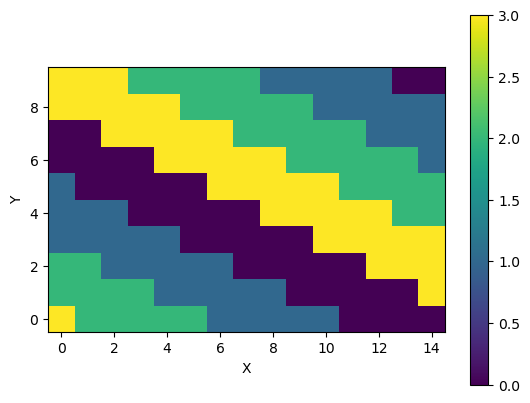

In [122]:
%matplotlib inline

mg = RasterModelGrid((10, 15))
z = mg.add_zeros("topographic__elevation", at="node")

layer_elevations = 5.0 * np.arange(-10, 10)

# we create a bottom layer that is very thick.
layer_elevations[-1] = layer_elevations[-2] + 100

layer_ids = np.tile([0, 1, 2, 3], 5)

attrs = {"K_sp": {0: 0.0003, 1: 0.0001, 2: 0.0002, 3: 0.0004}}

lith = LithoLayers(
    mg, layer_elevations, layer_ids, function=lambda x, y: x + (2 * y), attrs=attrs
)

mg.imshow("rock_type__id", cmap="viridis")




In [115]:
z -= 1.0
dz_ad = 0.0
lith.dz_advection = dz_ad
lith.run_one_step()

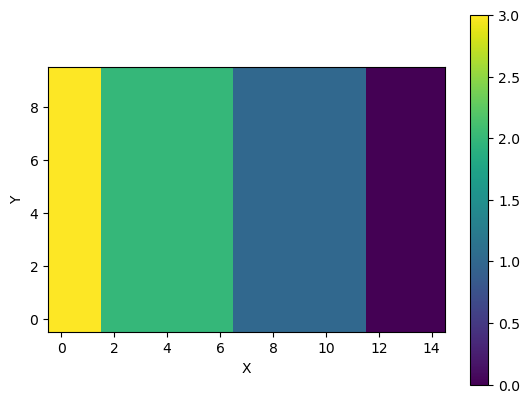

In [116]:
mg.imshow("rock_type__id", cmap="viridis")

In [117]:
z += 1.0
dz_ad = 0.0

lith.dz_advection = dz_ad
lith.rock_id = 0

lith.run_one_step()

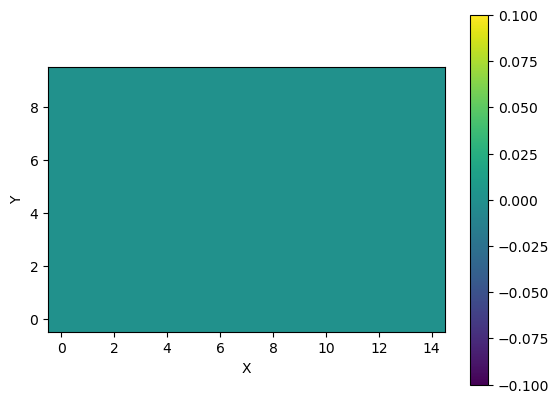

In [118]:
mg.imshow("rock_type__id", cmap="viridis")

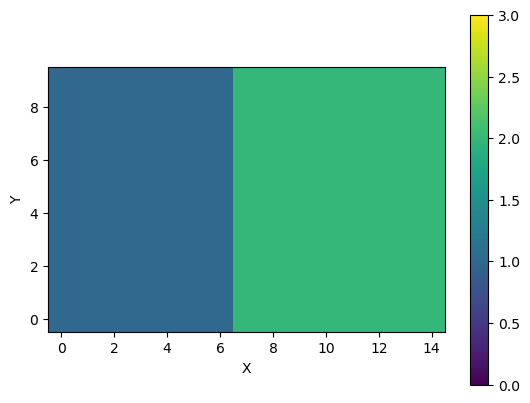

In [119]:
z += 2.0
dz_ad = 0.0
spatially_variable_rock_id = mg.ones("node")
spatially_variable_rock_id[mg.x_of_node > 6] = 2

lith.dz_advection = dz_ad
lith.rock_id = spatially_variable_rock_id

lith.run_one_step()
mg.imshow("rock_type__id", cmap="viridis", vmin=0, vmax=3)

:HoloMap   [y]
   :Image   [x,z]   (Rock Type ID Code)
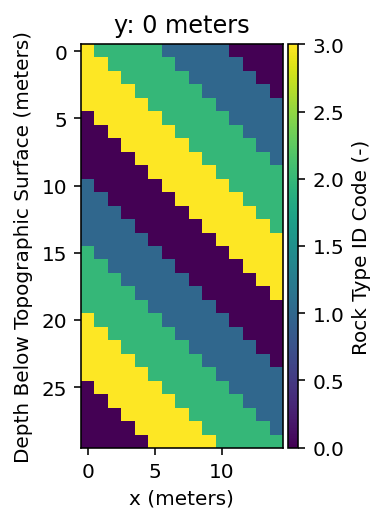
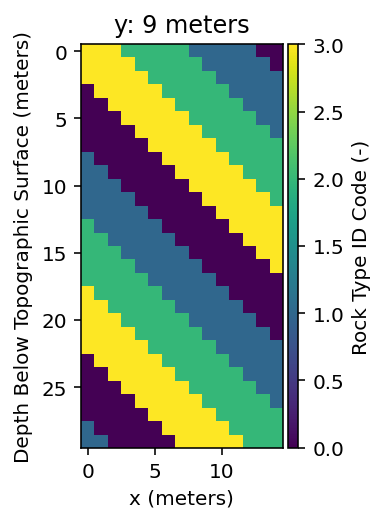
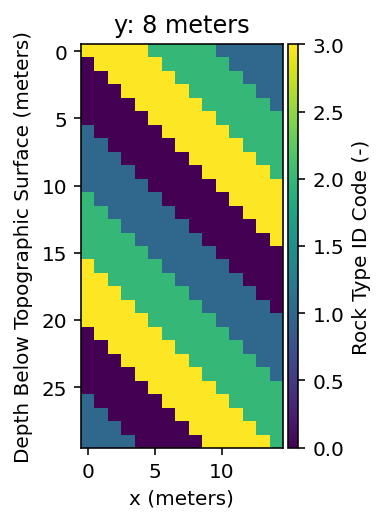
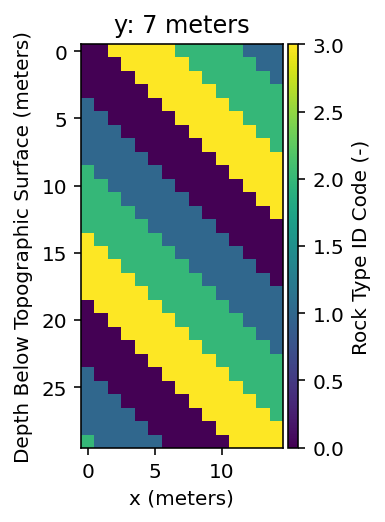
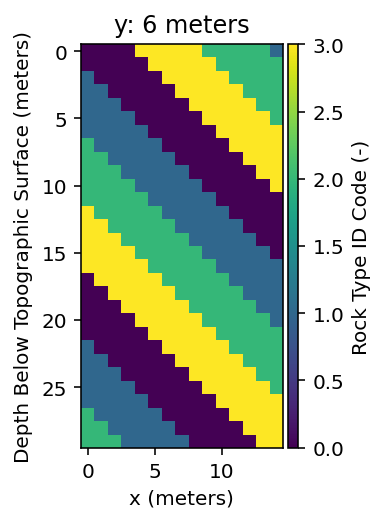
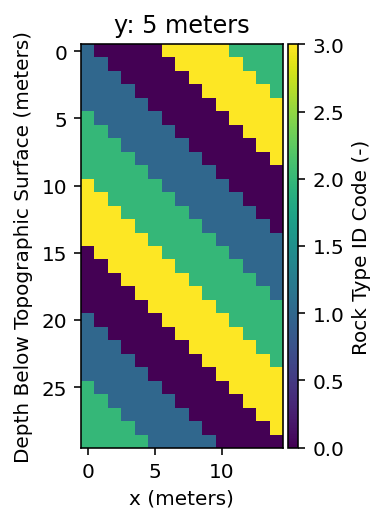
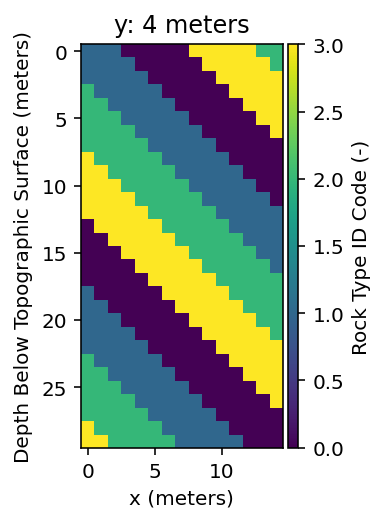
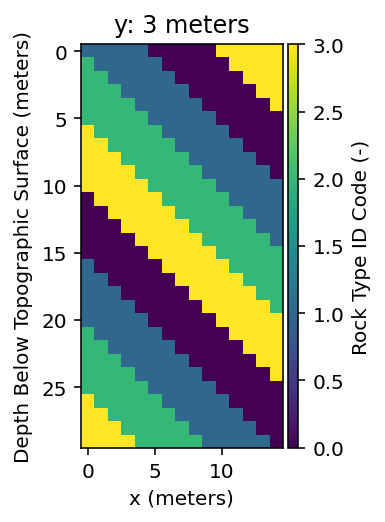
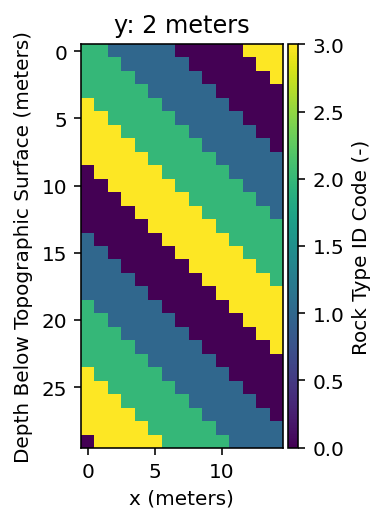
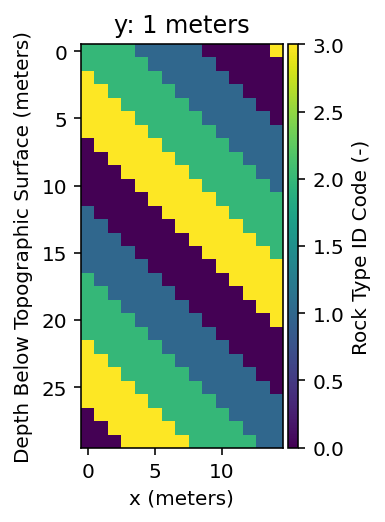
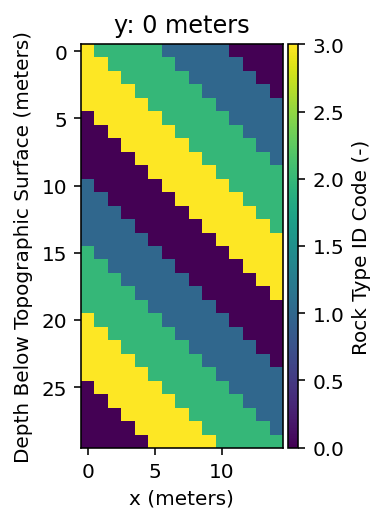

In [123]:
ds = lith.rock_cube_to_xarray(np.arange(30))
hvds_rock = hv.Dataset(ds.rock_type__id)

%opts Image style(cmap='viridis') plot[colorbar=True]
hvds_rock.to(hv.Image, ["x", "z"])

:HoloMap   [y]
   :Image   [x,z]   (Rock Type ID Code)
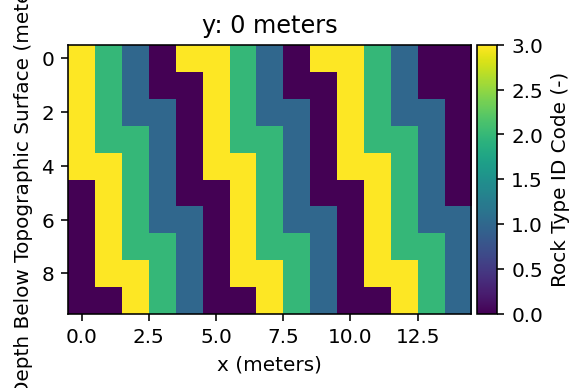
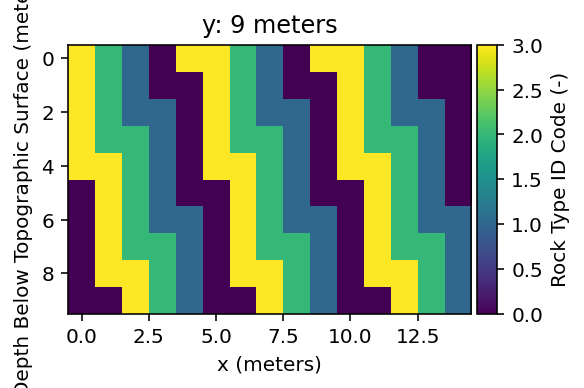
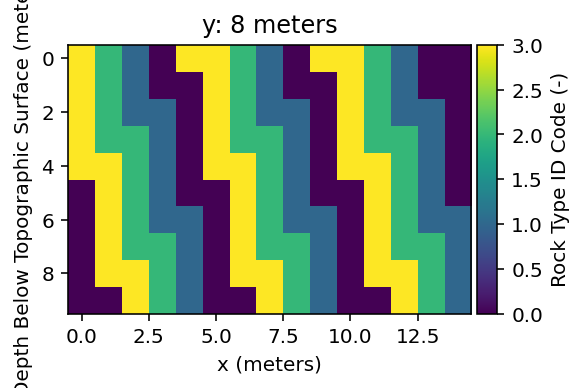
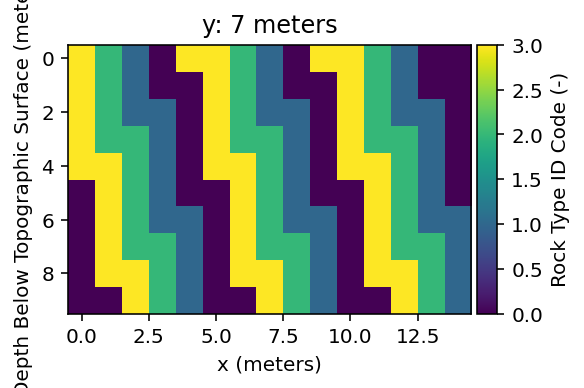
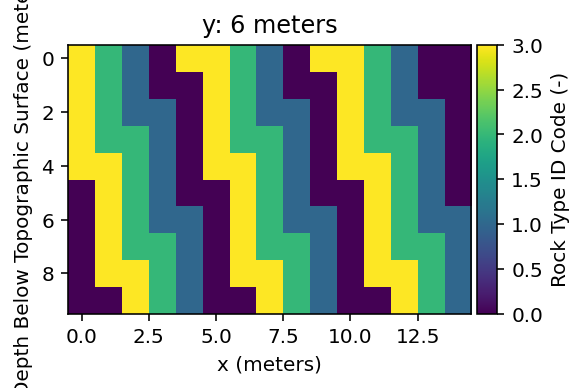
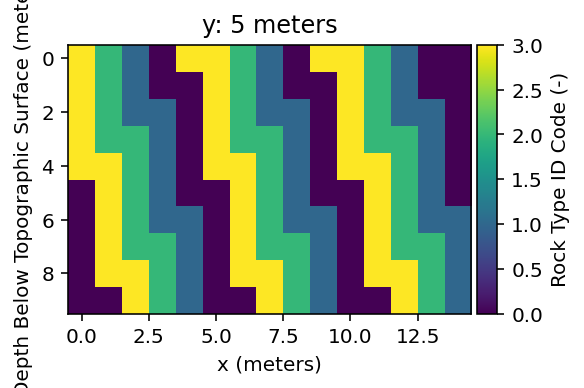
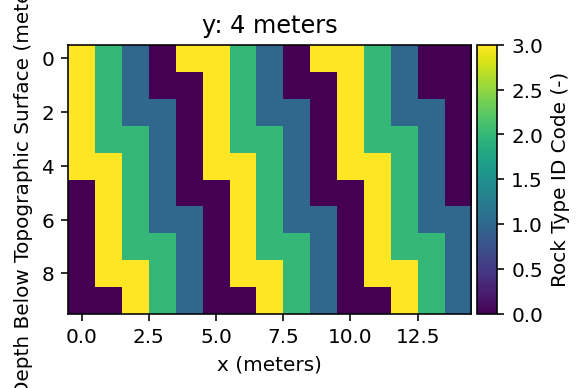
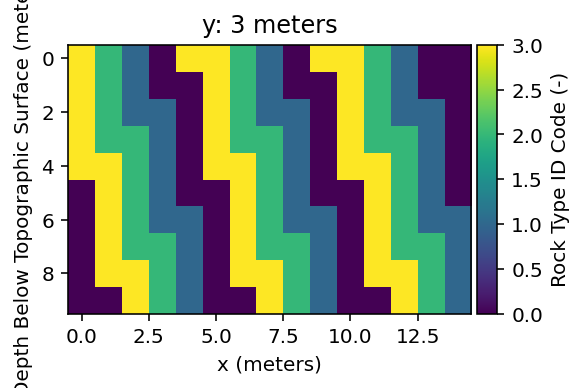
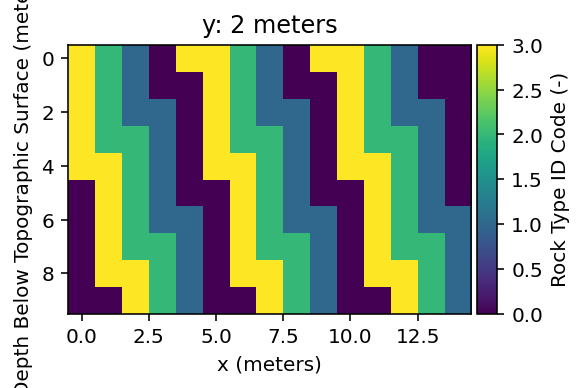
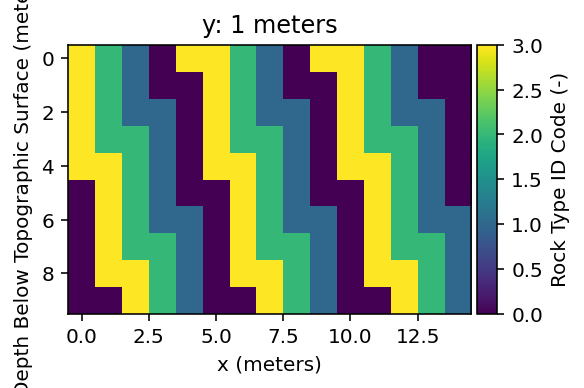
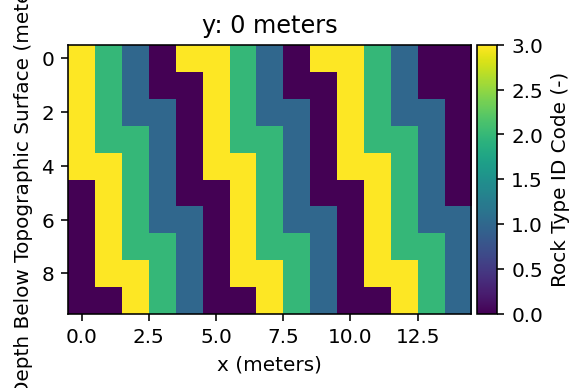

In [113]:
# Parameters that control the size and shape of the model grid
number_of_rows = 10
number_of_columns = 15
dx = 1

# Parameters that control the LithoLayers

# the layer shape function
func = lambda x, y: (4 * x) + (0 * y)

# the layer thicknesses
layer_thickness = 5.

# the location of the anchor point
x0 = 0
y0 = 0

# the resolution at which you sample to create the plan view and cros-section view figures.
sample_depths = np.arange(0, 10, 1)

# create the model grid
mg = RasterModelGrid((number_of_rows, number_of_columns), dx)
z = mg.add_zeros('topographic__elevation', at='node')

# set up LithoLayers inputs
layer_ids = np.tile([0, 1, 2, 3], 5)
layer_elevations = layer_thickness * np.arange(-10, 10)
total_rock_thickness = layer_elevations[-1] - layer_elevations[0]

attrs = {'K_sp': {0: 0.0003, 1: 0.0001, 2: 0.0002, 3: 0.0004}}

# create LithoLayers
lith = LithoLayers(mg,
                   layer_elevations,
                   layer_ids,
                   x0=x0,
                   y0=y0,
                   function=func,
                   attrs=attrs)

# deposity and erode
# dz_ad = 0.

# z -= 1.
# lith.dz_advection=dz_ad
# lith.run_one_step()

# z += 1.
# lith.dz_advection=dz_ad
# lith.rock_id=0
# lith.run_one_step()

# z += 2.
# spatially_variable_rock_id = mg.ones('node')
# spatially_variable_rock_id[mg.x_of_node > 6] = 2
# lith.dz_advection=dz_ad
# lith.rock_id=spatially_variable_rock_id
# lith.run_one_step()

# get the rock-cube data structure and plot
ds = lith.rock_cube_to_xarray(sample_depths)
hvds_rock = hv.Dataset(ds.rock_type__id)

# make a plan view image
%opts Image style(cmap='viridis') plot[colorbar=True]
hvds_rock.to(hv.Image, ['x', 'z'])

In [79]:
print(total_rock_thickness)

190.0


In [70]:
print(layer_ids)

[0 1 2 3 0 1 2 3 0 1 2 3 0 1 2 3 0 3 3 3]
